# Title: 3D Conway's Game of Life

In [1]:
#defining important libraries 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook

In [2]:
#Creating HPC (High Performance Computing) abbreviation on the initial condition
n=10
Map = np.random.randint(1, size=(n, n, n))
Colors=['#722620', '#F2BC94']
for i in range(2):
    #H
    Map[0,i,:]=1
    Map[3,i,:]=1
    Map[0:4,i,n//2]=1
    #P
    Map[5,i,:]=1
    Map[8,i,5:n]=1
    Map[5:9,i,n-1]=1
    Map[5:9,i,n//2]=1
#C
Map[n-1,2,:]=1
Map[n-1,2:7,0]=1
Map[n-1,2:7,n-1]=1
Map[n-1,3,:]=1
Map[n-1,3:7,1]=1
Map[n-1,3:7,n-2]=1

In [3]:
#creating a function to style and plot 3D and save gifs
def PlotMap(VMap, ii):
    n=VMap.shape[0]
    counter=range(n)
    plt.style.use('dark_background')
    fig = plt.figure(figsize = (9, 6))
    ax = fig.add_subplot(111, projection='3d')
    for i in counter:
        for j in counter:
            for k in counter:
                ax.scatter([i],[j],[k], alpha=0.75, color=Colors[VMap[i,j,k]], marker='s', s=100)
                
    ax.set_axis_off()
    #ax.view_init(1, 30+3*ii)
    plt.title("3D Conway's Game of Life")
    plt.savefig('{}.png'.format(str(100+ii)))
    plt.show()

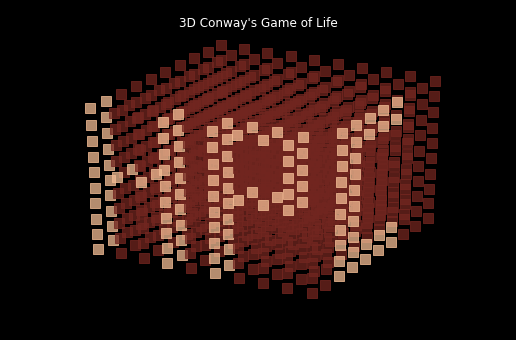

In [4]:
PlotMap(Map, 0)

In [5]:
#function for saving the neighbours 
def count_neighbours(i, j, k, VMap):
    sum=-VMap[i,j,k]
    n=VMap.shape[0]
    for ni in range(-1,2):
        for nj in range(-1,2):
            for nk in range(-1,2):
                ii=(i+ni)%n
                jj=(j+nj)%n
                kk=(k+nk)%n
            sum=sum+VMap[ii,jj,kk]
    DeadNeigh=26-sum
    LiveNeigh=sum
    return DeadNeigh,LiveNeigh 

In [6]:
#Defining function that uses rules and draw 3D plot 

def NextStateofMapAndDeadColor(StateRuleN, VMap):
    n=VMap.shape[0]
    VVMap=VMap.copy()
    for i in range(n):
        for j in range(n):
            for k in range(n):
                DeadNeigh, LiveNeigh=count_neighbours(i, j, k, VMap)
                #1st StateRule
                if StateRuleN==1:
                    if VMap[i,j,k]==0:
                        VVMap[i,j,k]=int(LiveNeigh>=3)
                    else:
                        BoolV=(LiveNeigh<=3) or (LiveNeigh>=24)
                        VVMap[i,j,k]=int(not BoolV)
                #2nd StateRule
                if StateRuleN==2:
                    if VMap[i,j,k]==0:
                        VVMap[i,j,k]=int(LiveNeigh>=1)
                    else:
                        BoolV=(LiveNeigh<=4) or (LiveNeigh>=23)
                        VVMap[i,j,k]=int(not BoolV)
                #3rd StateRule
                if StateRuleN==3:
                    if VMap[i,j,k]==0:
                        VVMap[i,j,k]=int(LiveNeigh>=5)
                    else:
                        BoolV=(LiveNeigh<=2) or (LiveNeigh>=20)
                        VVMap[i,j,k]=int(not BoolV)
    return VVMap

In [7]:
#Function to draw the evolutions 
import time
def DrawEvolutions(StateRuleN, Niteration, VMap):
    VVMap=VMap.copy()
    PlotMap(VVMap, 0)
    start = time.time()
    for i in range(Niteration):
        VVMap=NextStateofMapAndDeadColor(StateRuleN, VVMap)
        PlotMap(VVMap, i+1)
    end = time.time()
    print("Sequential time(s):", (end - start))

# Rule 1

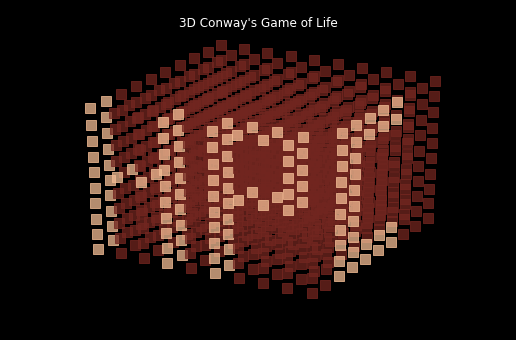

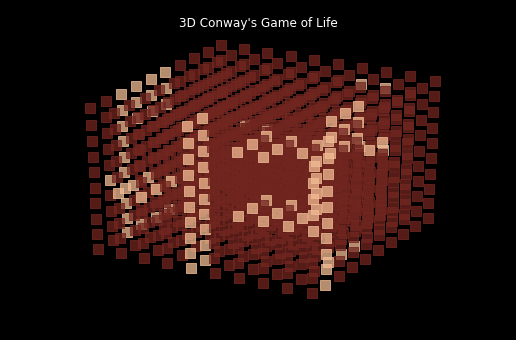

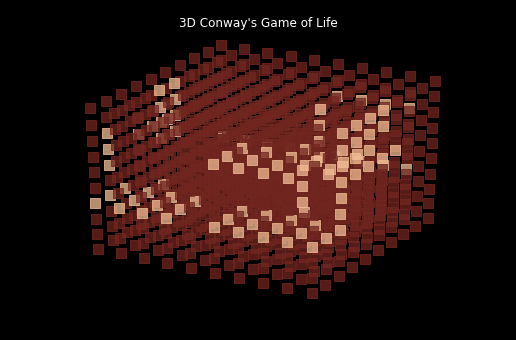

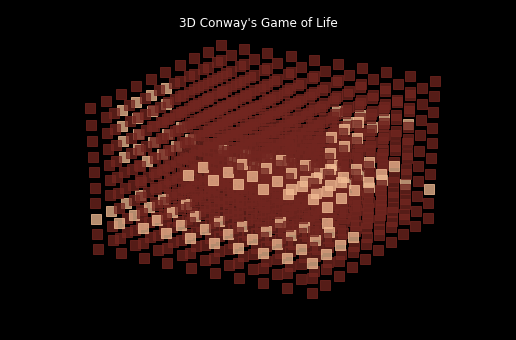

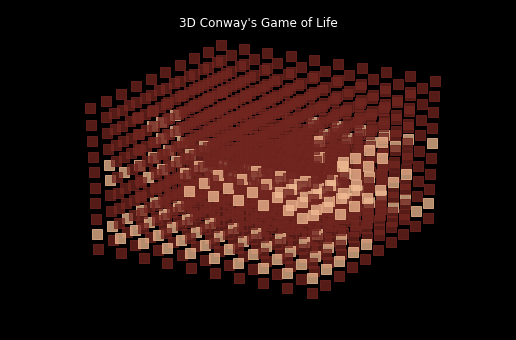

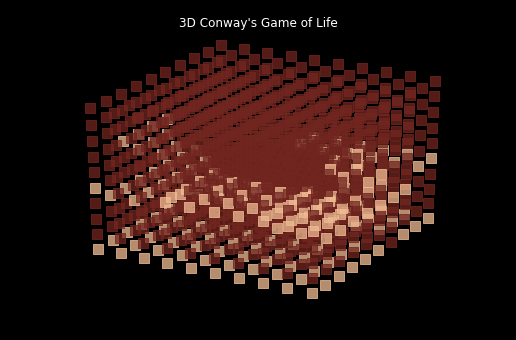

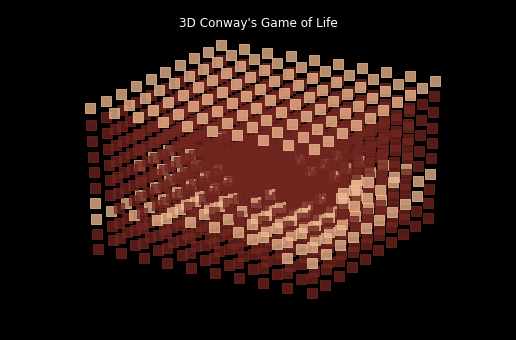

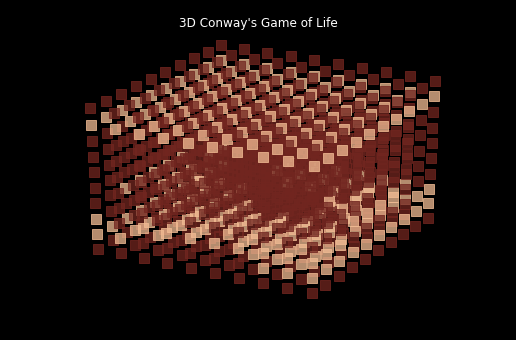

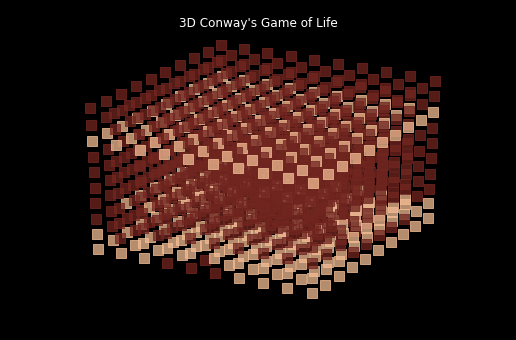

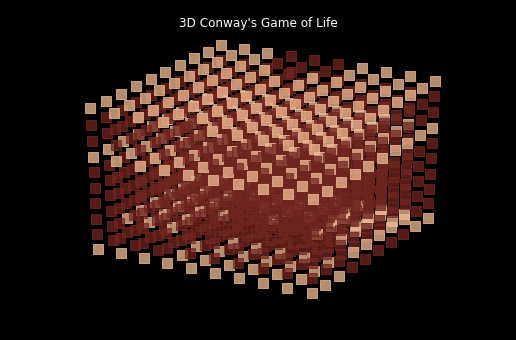

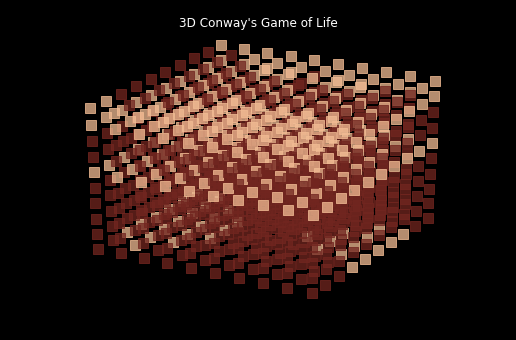

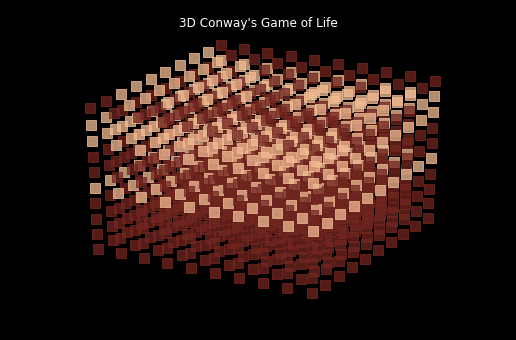

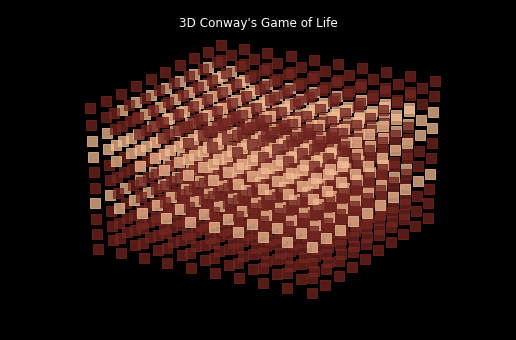

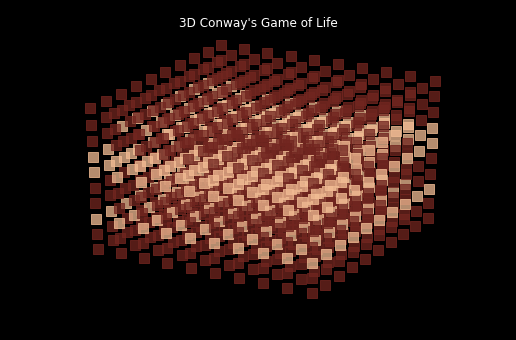

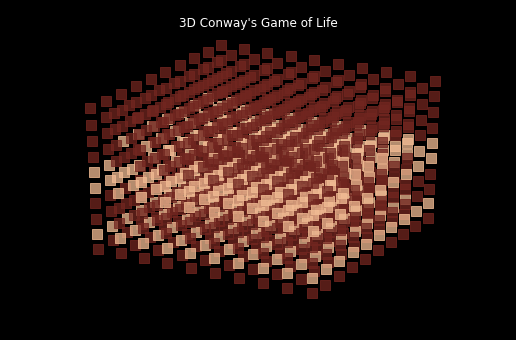

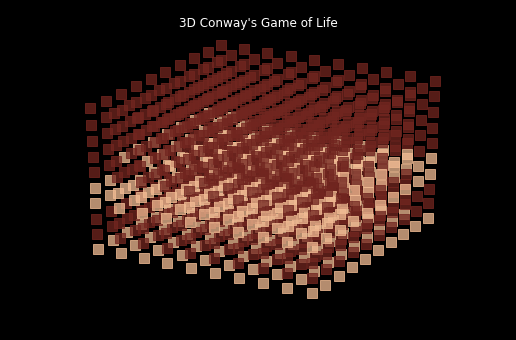

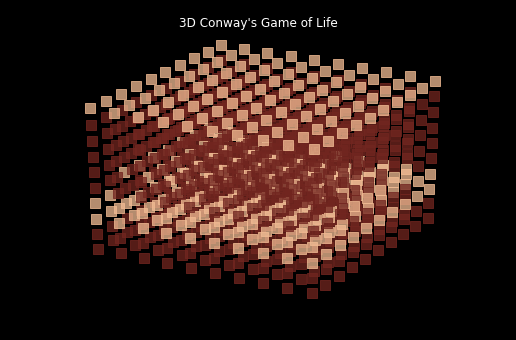

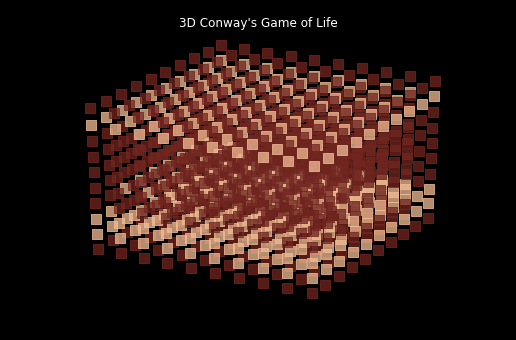

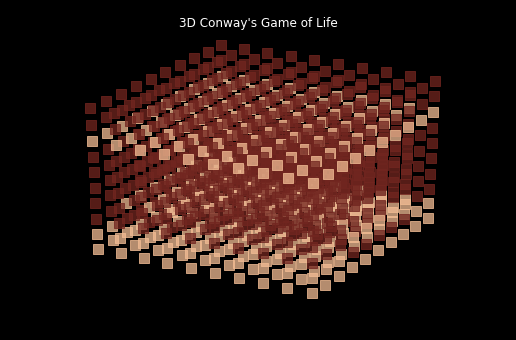

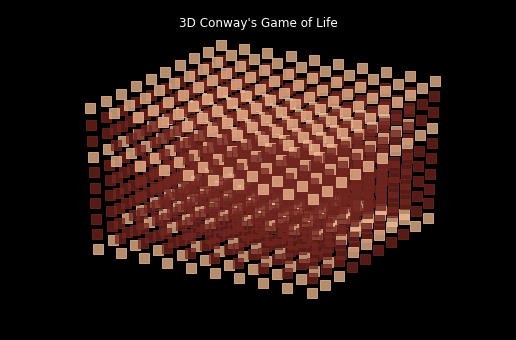

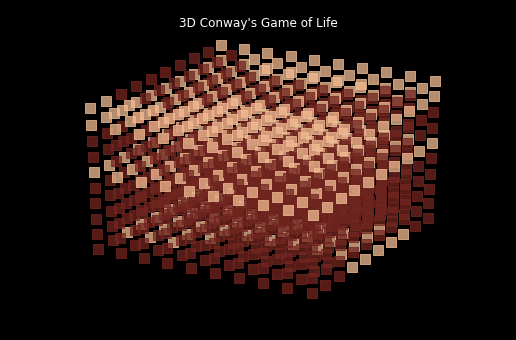

Sequential time(s): 133.89705181121826


In [8]:
# here we draw rule and number of iterations, please choose the rule and define num of iterations
DrawEvolutions(1, 20, Map)

# Rule 2

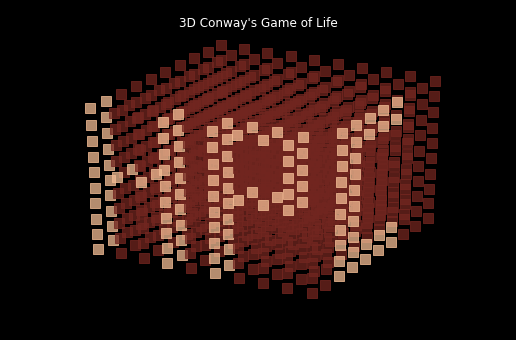

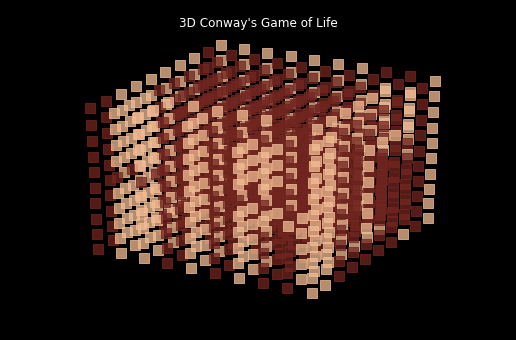

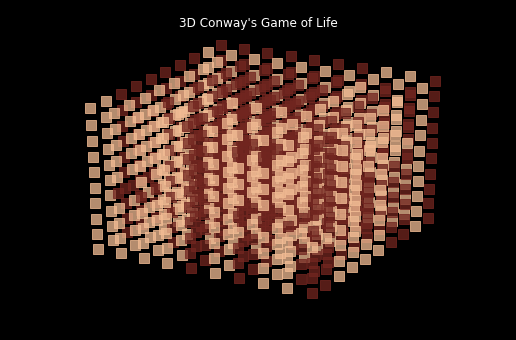

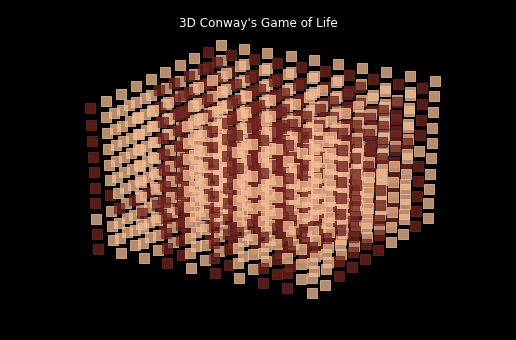

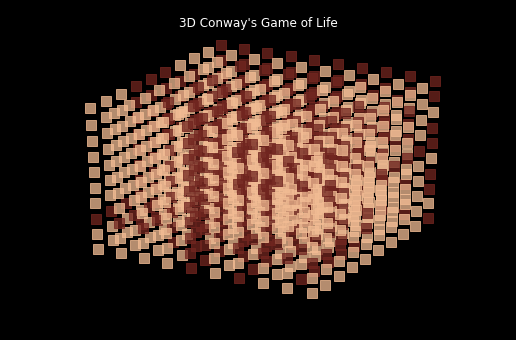

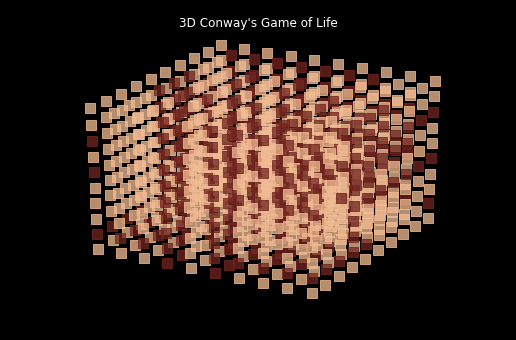

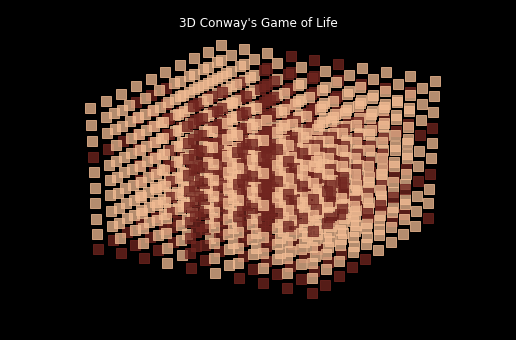

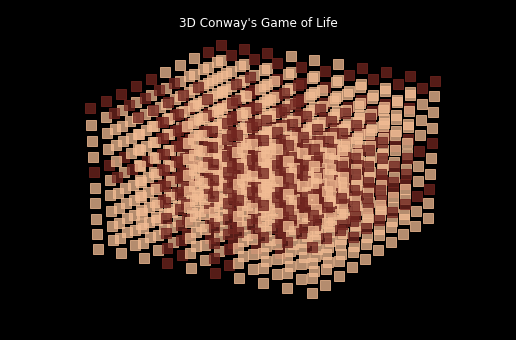

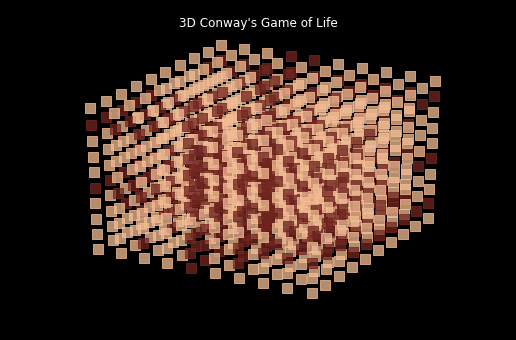

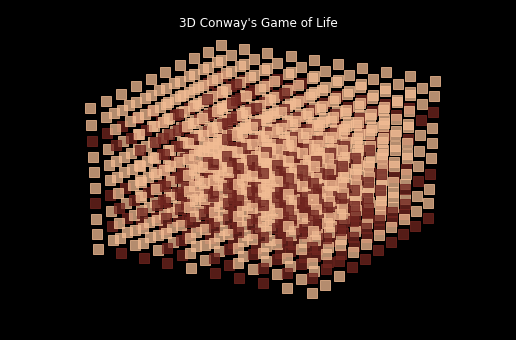

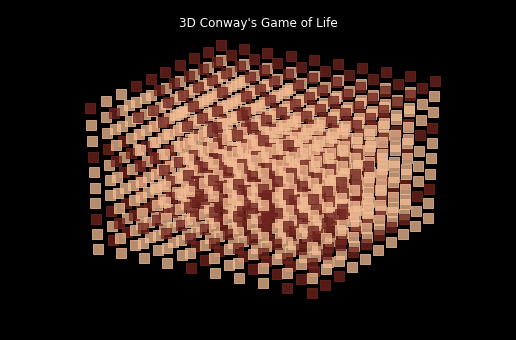

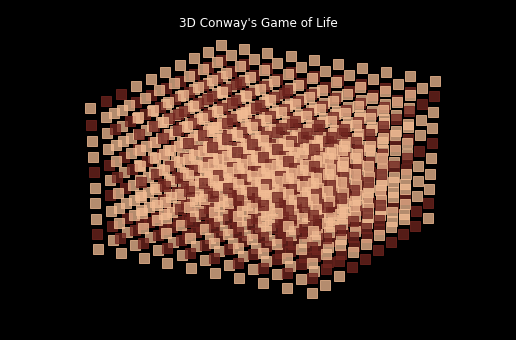

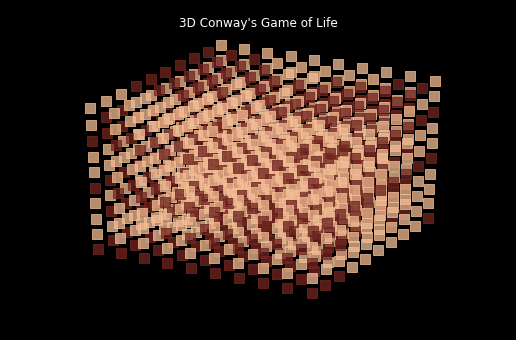

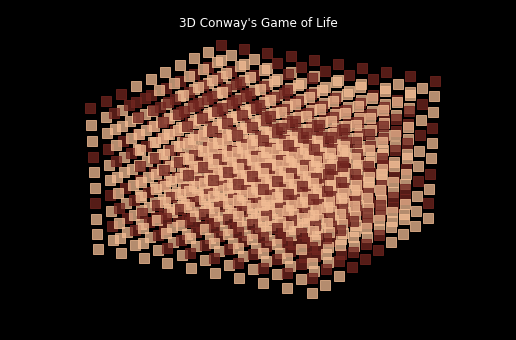

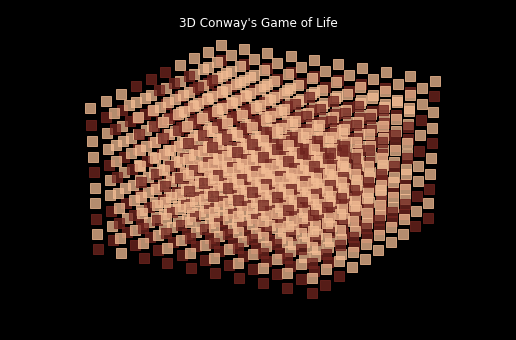

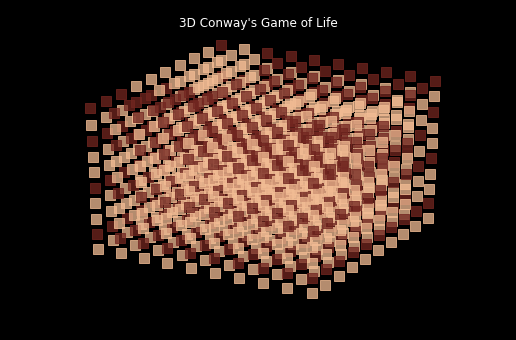

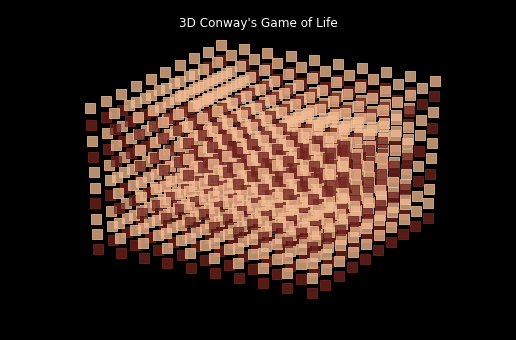

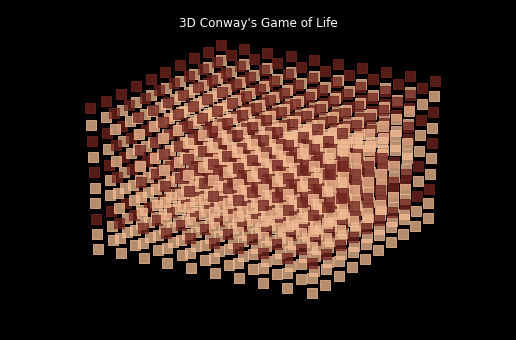

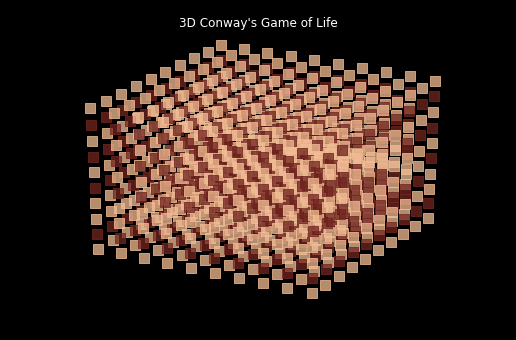

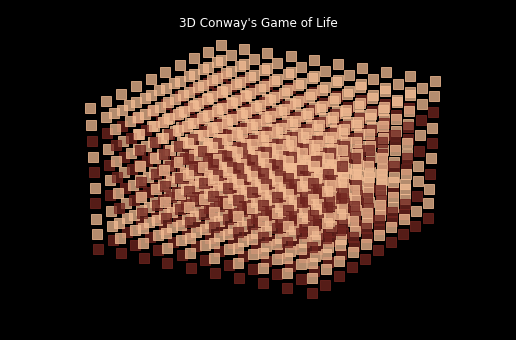

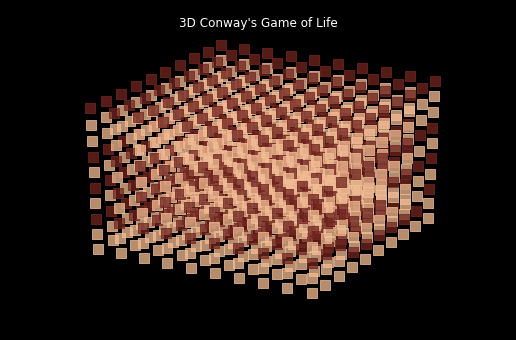

Sequential time(s): 131.64065957069397


In [9]:
# here we draw rule and number of iterations, please choose the rule and define num of iterations
DrawEvolutions(2, 20, Map)

# Rule 3

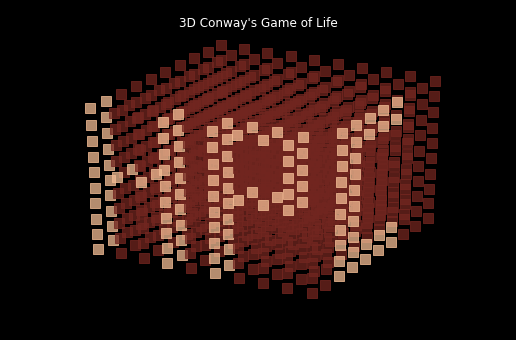

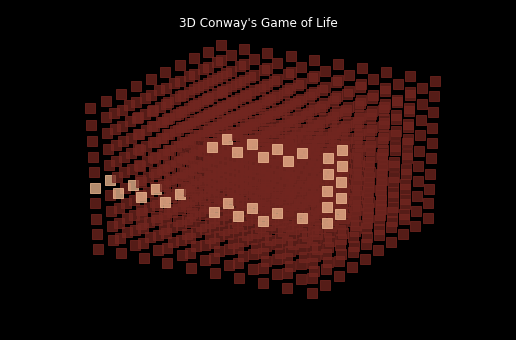

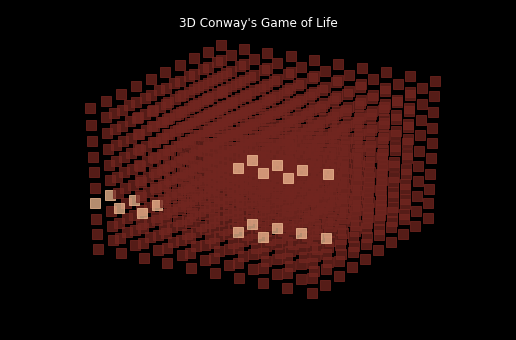

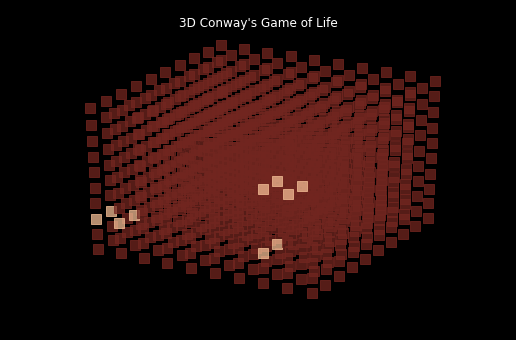

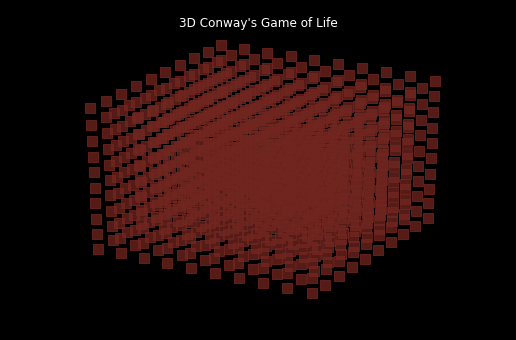

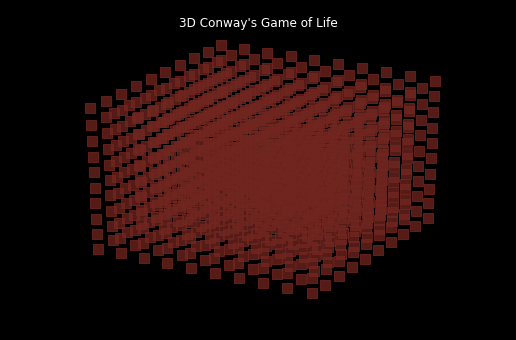

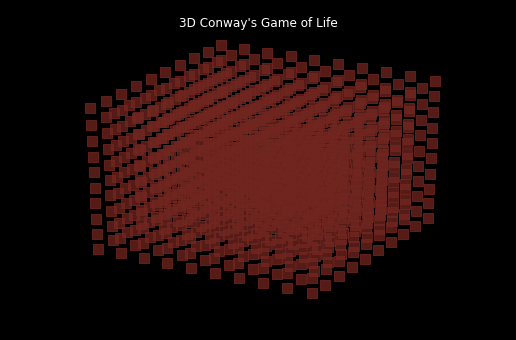

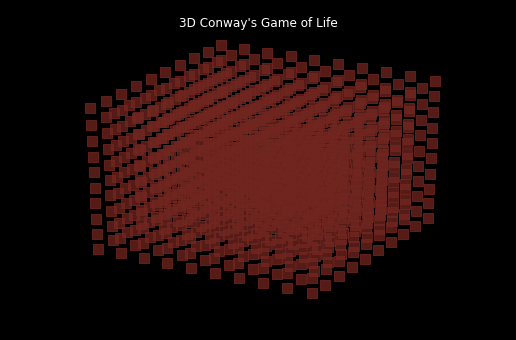

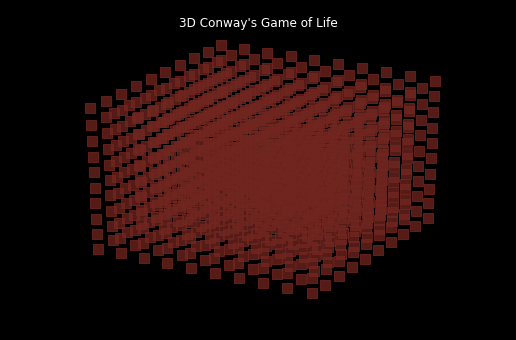

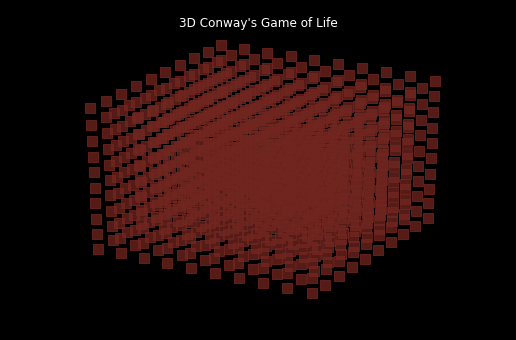

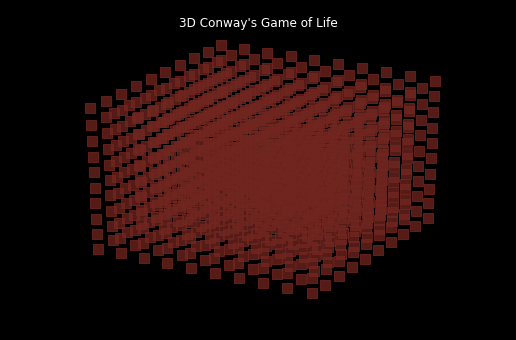

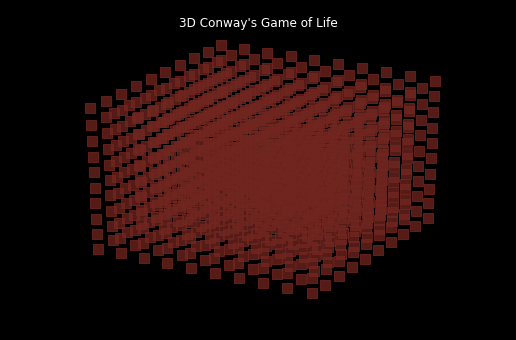

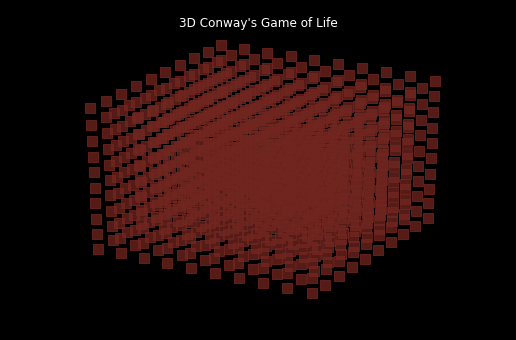

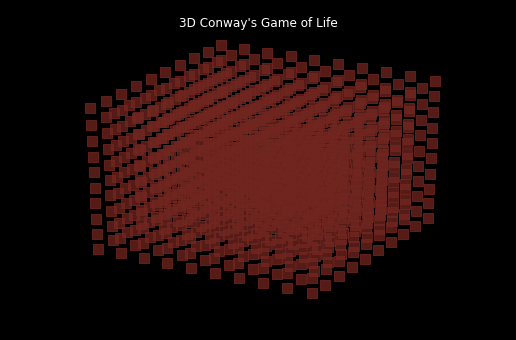

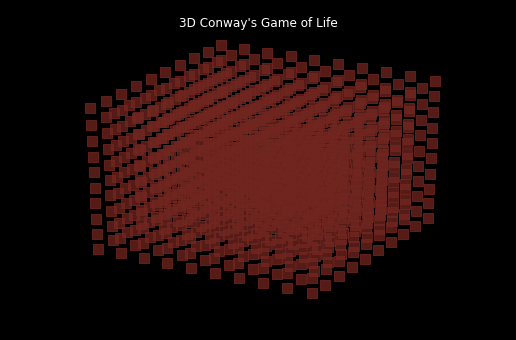

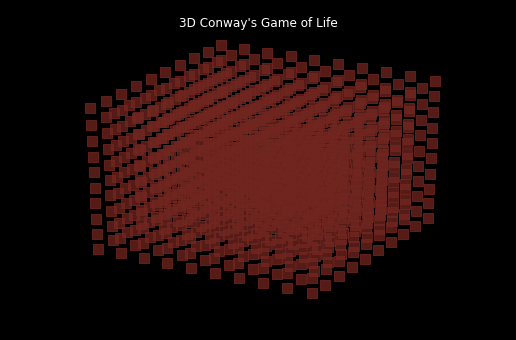

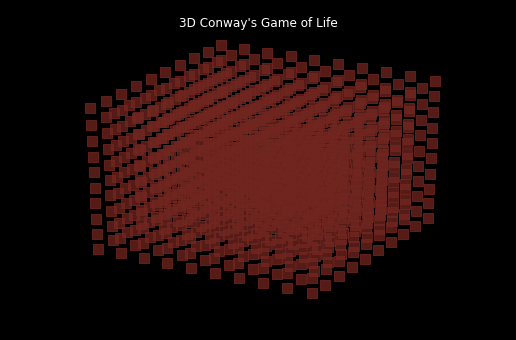

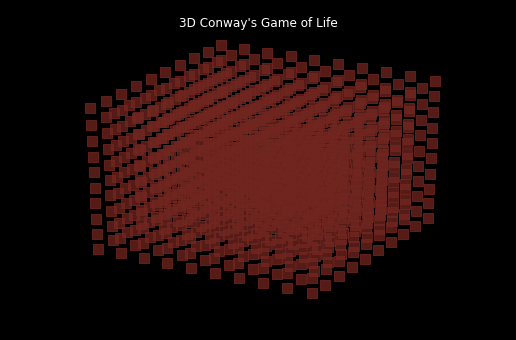

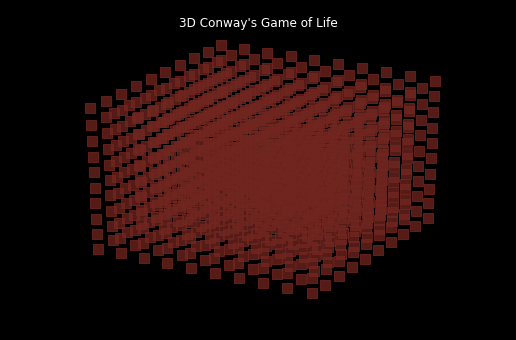

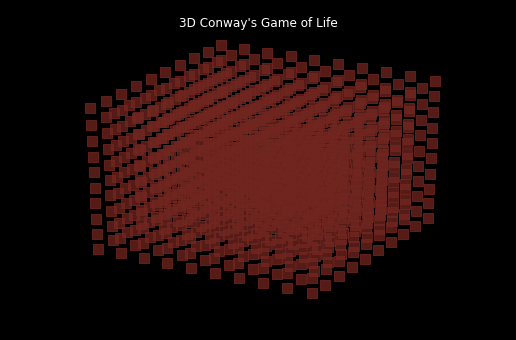

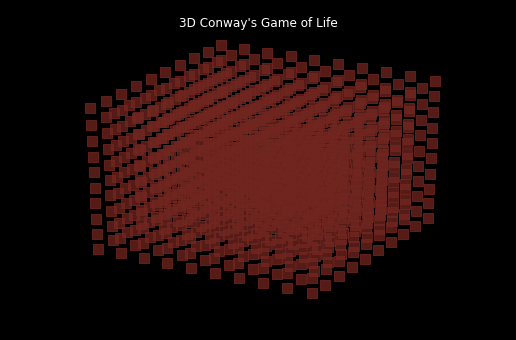

Sequential time(s): 130.71275305747986


In [10]:
# here we draw rule and number of iterations, please choose the rule and define num of iterations
DrawEvolutions(3, 20, Map)

# Create a gif

In [11]:
import imageio
import os
def CreateGifFile(title):
    path = '/home/test/Desktop/HPC/Project'
    image_folder = os.fsencode(path)
    print(image_folder)
    filenames = []

    for file in os.listdir(image_folder):
        filename = os.fsdecode(file)
        if filename.endswith( ('.png') ):
            filenames.append(filename)

    filenames.sort() # this iteration technique has no built in order, so sort the frames
    images = list(map(lambda filename: imageio.imread(filename), filenames))
    imageio.mimsave(os.path.join(title), images, duration=0.4)

In [12]:
#Function for deleting the already created images, in case you run new you can delete previous images
def RemovePNGFileinDIR():
    path = '/home/test/Desktop/HPC/Project'#Please specify your directory 
    image_folder = os.fsencode(path)
    filenames = []
    for file in os.listdir(image_folder):
        filename = os.fsdecode(file)
        if filename.endswith( ('.png') ):
            os.remove(filename)

In [13]:
#Run to create final
CreateGifFile('3D_pic.gif')

b'/home/test/Desktop/HPC/Project'


In [14]:
#Please uncomment to remove the images from your directory
#RemovePNGFileinDIR()

# MPI Parallel 3D Conway's Game of Life 

In [15]:
!pip install mpi4py

In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
%%file Parallel3DGameOfLife.py
from mpi4py import MPI
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set()

def PlotMap(VMap, fname):
    n=VMap.shape[0]
    counter=range(n)
    plt.style.use('dark_background')
    fig = plt.figure(figsize=(9,6))
    ax = fig.add_subplot(111, projection='3d')
    for i in counter:
        for j in counter:
            for k in counter:
                ax.scatter([i],[j],[k], alpha=0.75, color=Colors[VMap[i,j,k]], marker='s', s=50)
    ax.set_axis_off()
    plt.title("3D Conway's Game of Life")
    plt.savefig(fname)

def count_neighbours(i, j, k, VMap):
    sum=-VMap[i,j,k]
    n1,n2,n3=VMap.shape[0],VMap.shape[1],VMap.shape[2]
    for ni in range(-1,2):
      for nj in range(-1,2):
          for nk in range(-1,2):
              ii=(i+ni)%n1
              jj=(j+nj)%n2
              kk=(k+nk)%n3
          sum=sum+VMap[ii,jj,kk]
    DeadNeigh=26-sum
    LiveNeigh=sum
    return DeadNeigh,LiveNeigh 

def NextStateofMapAndDeadColor(StateRuleN, VMap):
    n1,n2,n3=VMap.shape[0],VMap.shape[1],VMap.shape[2]
    VVMap=VMap.copy()
    for i in range(n1):
        for j in range(n2):
            for k in range(1,n3-1):
                DeadNeigh, LiveNeigh=count_neighbours(i, j, k, VMap)
                #1st StateRule
                if StateRuleN==1:
                    if VMap[i,j,k]==0:
                        VVMap[i,j,k]=int(LiveNeigh>=3)
                    else:
                        BoolV=(LiveNeigh<=3) or (LiveNeigh>=24)
                        VVMap[i,j,k]=int(not BoolV)
                #2nd StateRule
                if StateRuleN==2:
                    if VMap[i,j,k]==0:
                        VVMap[i,j,k]=int(LiveNeigh>=11)
                    else:
                        BoolV=(LiveNeigh<=4) or (LiveNeigh>=22)
                        VVMap[i,j,k]=int(not BoolV)
                #3rd StateRule
                if StateRuleN==3:
                    if VMap[i,j,k]==0:
                      VVMap[i,j,k]=int(LiveNeigh>=9)
                    else:
                        BoolV=(LiveNeigh<=6) or (LiveNeigh>=20)
                        VVMap[i,j,k]=int(not BoolV)
    return VVMap


comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

n=10
Map = np.random.randint(1, size=(n, n, n))
Colors=['#722620', '#F2BC94']
for i in range(2):
    #H
    Map[0,i,:]=1
    Map[3,i,:]=1
    Map[0:4,i,n//2]=1
    #P
    Map[5,i,:]=1
    Map[8,i,5:n]=1
    Map[5:9,i,n-1]=1
    Map[5:9,i,n//2]=1
#C
Map[n-1,2,:]=1
Map[n-1,2:7,0]=1
Map[n-1,2:7,n-1]=1
Map[n-1,3,:]=1
Map[n-1,3:7,1]=1
Map[n-1,3:7,n-2]=1

PlotMap(Map, 'Init_HPC.png')

t1 = MPI.Wtime()
ShareColWidth=n // size
my_beg_idx=rank*ShareColWidth
my_end_idx=(rank+1)*ShareColWidth

if rank==size-1:
  my_end_idx=n
  ShareColWidth=n-my_beg_idx

idxleft=(my_beg_idx-1) % n
idxright=my_end_idx % n
Ta=np.zeros((n,n,2+my_end_idx-my_beg_idx))
Ta[:,:,0]=Map[:, :, idxleft]
Ta[:,:,1:my_end_idx-my_beg_idx+1]=Map[:, :, my_beg_idx:my_end_idx]
Ta[:,:,my_end_idx-my_beg_idx+1]=Map[:, :, idxright]
data=comm.gather(NextStateofMapAndDeadColor(1,Ta), root=0)
TIME = comm.gather((MPI.Wtime() - t1), root=0)

if rank == 0:
  StackedData=np.zeros((n, n, n),dtype=int)
  chanksSize = n // size  
  for i in range(size):
    my_end_idx=(i+1)*chanksSize
    if i==size-1:
      my_end_idx=n
    NDataCol=data[i].shape[2]
    StackedData[:, :, i*chanksSize:my_end_idx]=np.array(data[i][:, :, 1: NDataCol-1])
  print(np.sum(TIME)/size)
  PlotMap(StackedData, 'Next_HPC.png')

Overwriting Parallel3DGameOfLife.py


In [18]:
NProc=2

In [19]:
t=!mpirun --allow-run-as-root -np {NProc} python Parallel3DGameOfLife.py

In [20]:
print("Execution time with",NProc, "processors is", float(t[0]))

Execution time with 2 processors is 0.0400820775


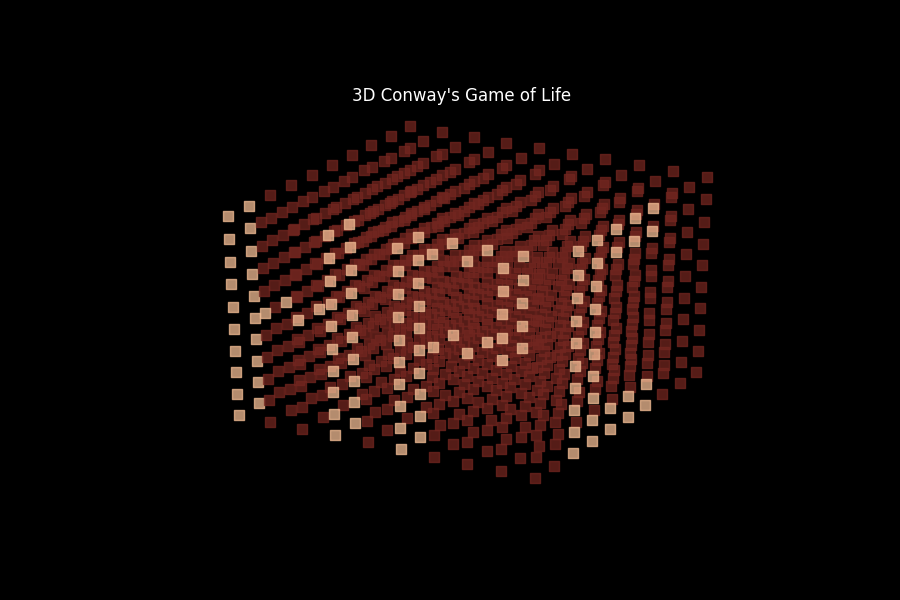

In [21]:
from IPython.display import Image
Image("Init_HPC.png")

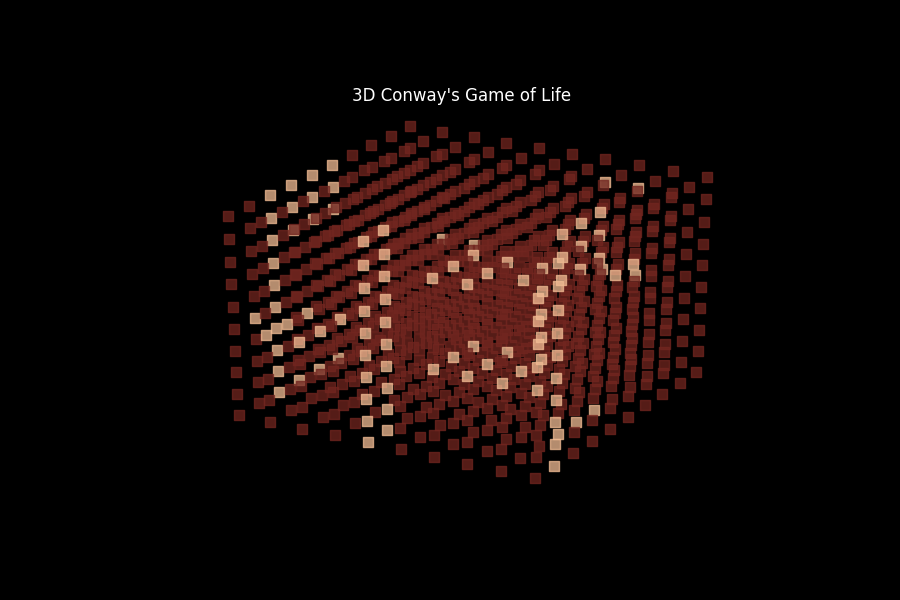

In [22]:
Image("Next_HPC.png")

In [1]:
#time = np.zeros(2, dtype="float64")
#speedup = np.zeros(2, dtype="float64")

#processors = [1, 2]

#for size in processors:
#    t = !mpiexec --allow-run-as-root -n {size} python Parallel3DGameOfLife.py
#    print("Number of Processors:", size, " Time: ", t[0])
#    time[size-1] = float(t[0]) 
#    speedup[size-1] = time[0]/float(t[0])

#plt.figure(figsize=(9,8))
#plt.plot(processors, speedup)
#plt.ylabel('Speedup')
#plt.xticks([1,2])
#plt.xlabel('Num of Proccessers')
#plt.title('Speedup vs Number of Processors')
#plt.show()
#speedup

## Conclusion: In this project work, we have implemented 3D Conway's Game of Life with serval rules chosen based on our preference and we have experimented different cases after that we calculated the timeing of the each rule and got huge time, since then we decided to use parralellize the work to achieve better performance and implemented MPI to parallelize and achieved some good results